#                                      Red Wine Data Analysis

## Setting up the development environment by importing required libraries and modules:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


##### Numpy: It will provide the support for efficient numerical computation.
##### Pandas: It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data operations.
##### Matplotlib: It provides a MATLAB-like plotting framework.
##### Seaborn: It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive statistical graphics.
##### Sklearn: It is python library for data mining, data analysis and machine learning.

### Loading the Red Wine dataset

###### Here, we can use the read_csv() from the pandas library to load data into dataframe from the remote url.

In [2]:
red=pd.read_csv("winequality-red.csv",sep=";")

##### The head() function of pandas helps in viewing the preview of the dataset for n-number of rows

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploring the Red Wine dataset:

In [4]:
red.shape


(1599, 12)

In [5]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##### From above lines we can learn that there are total 1599 observations with 12 different feature variables/attributes present in the Red Wine dataset.

In [6]:
# Now, let's check the information about different variables/column from the dataset:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### * From the above information we can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.

In [7]:
# Let's look at the summary of the dataset,
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### * The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
#### * All the data seems to be in range (with different scales, which needs standardization).

In [8]:
#cheking for missing values and sum them 
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### From the above we can observe that there is no missing value in dataset
### Now we have to check if there are any 0's in the set

In [9]:
red.isin([0]).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

### We need to fill these 0's with some appropirate values

In [10]:
red=red.replace({'citric acid' : 0,},np.NaN)                     


red.isin([0]).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Calcutating the mean of citric acid

In [11]:
red['citric acid'].mean()

0.29535787321063395

### Replace this NaN with mean

In [12]:
red['citric acid'].isnull().sum()

132

In [13]:
red=red.fillna(red['citric acid'].mean())
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Learning more about the target/response variable/feature:

#### * Let's check how many unique values does the target feature 'quality' has? 

In [14]:
red["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

####      And how data is distributed among those values?

In [15]:
red.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

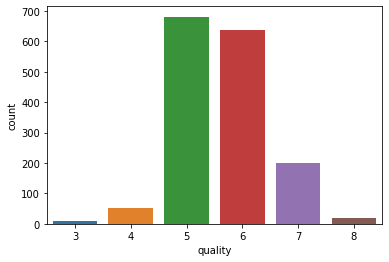

In [16]:
sns.countplot("quality",data=red)

#### * The above distribution shows the range for response variable (quality) is between 3 to 8.

#### Let's create a new discreet, categorical response variable/feature ('quality_label') from existing 'quality' variable.
#### i.e. low: 1-4,medium: 5-6 ,high: 7-10

In [17]:
condition=[(red["quality"]<4),(red["quality"]<7)]
quality_label=["Low","High"]
red["quality_label"]=np.select(condition,quality_label,default="Medium")
red.quality_label.value_counts()


High      1372
Medium     217
Low         10
Name: quality_label, dtype: int64

In [18]:
red.groupby('quality_label').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
High,8.235933,0.544563,0.281063,2.511224,0.089039,16.209913,48.456268,0.996855,3.314009,0.645299,10.253195,5.426385
Low,8.360000,0.884500,0.259607,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,3.000000
Medium,8.847005,0.405530,0.387386,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


### Creating a Heatmap

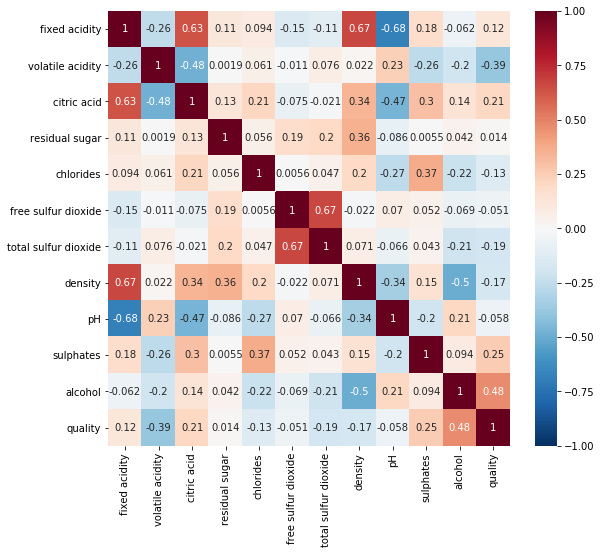

In [19]:
correlation=red.corr()
f,ax=plt.subplots(figsize=(9,8))
ax=sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,cmap="RdBu_r")

### sorting the features according to there effcts on outcome

In [20]:
correlation["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.210381
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### Plotting boxplot for selected features 

#### alcohol

Text(0.5, 1.0, 'red wine')

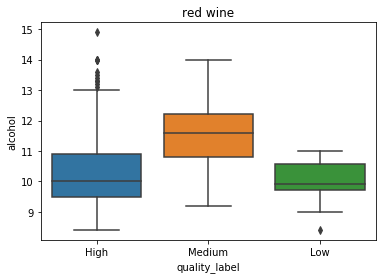

In [21]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="alcohol",data=red,ax=ax1)
ax1.set_title("red wine")

 #### sulphates

Text(0.5, 1.0, 'red wine')

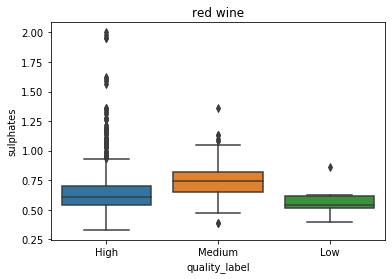

In [22]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="sulphates",data=red,ax=ax1)
ax1.set_title("red wine")

#### citric acid

Text(0.5, 1.0, 'red wine')

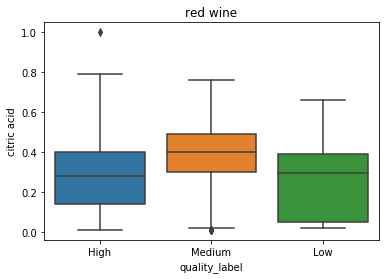

In [23]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="citric acid",data=red,ax=ax1)
ax1.set_title("red wine")

#### fixed acidity

Text(0.5, 1.0, 'red wine')

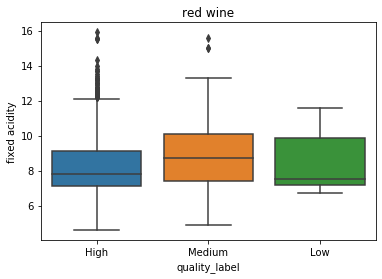

In [24]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="fixed acidity",data=red,ax=ax1)
ax1.set_title("red wine")

#### residual sugar

Text(0.5, 1.0, 'red wine')

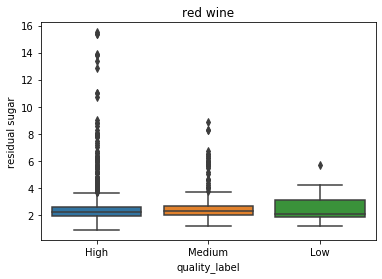

In [25]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="residual sugar",data=red,ax=ax1)
ax1.set_title("red wine")

#### free sulfur dioxide

Text(0.5, 1.0, 'red wine')

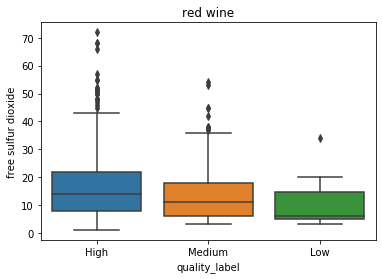

In [26]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="free sulfur dioxide",data=red,ax=ax1)
ax1.set_title("red wine")

#### pH

Text(0.5, 1.0, 'red wine')

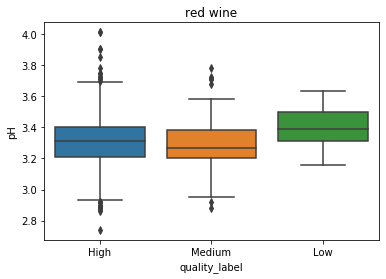

In [27]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="pH",data=red,ax=ax1)
ax1.set_title("red wine")

#### lmplot for alcohol vs other features with linear Regression 

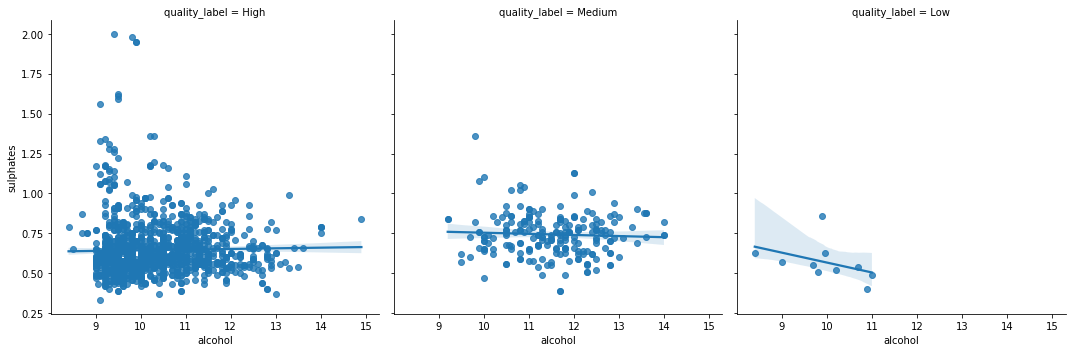

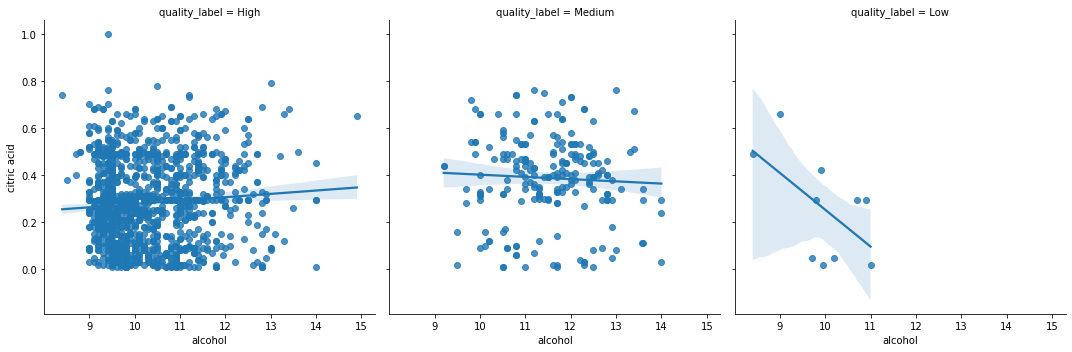

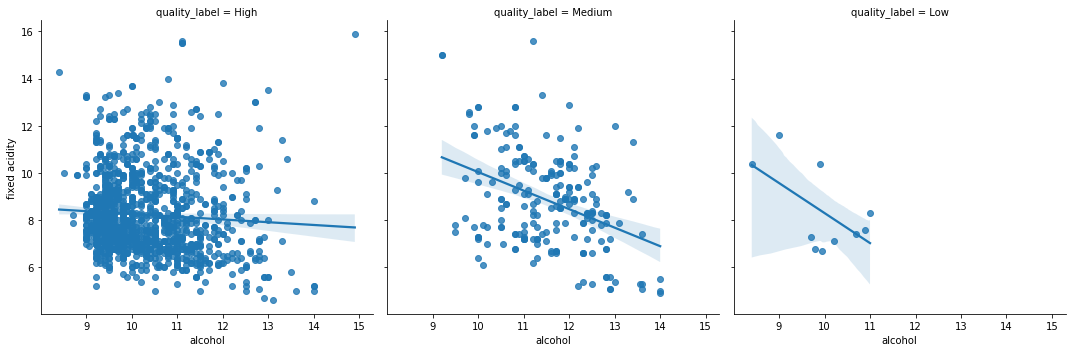

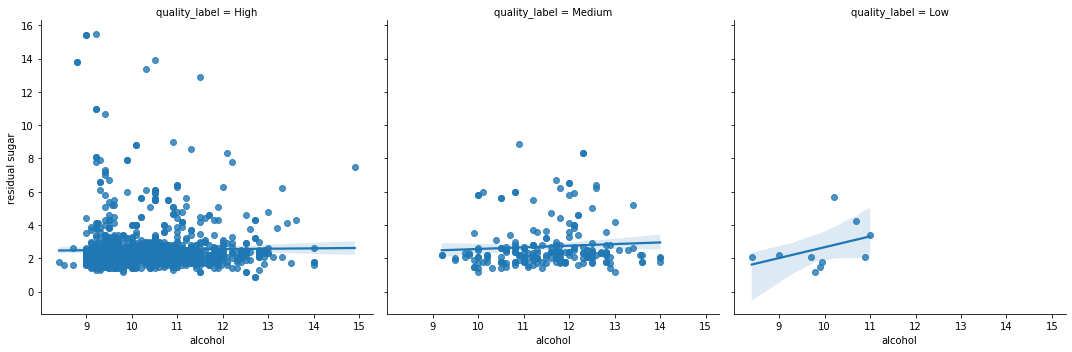

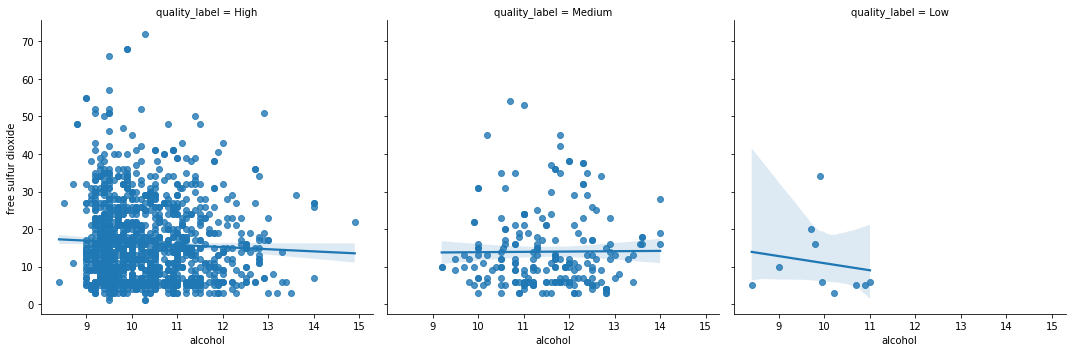

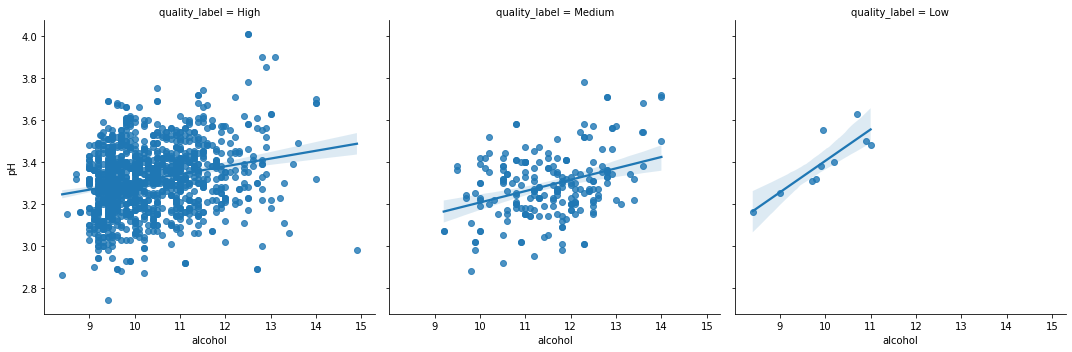

In [28]:
d=["sulphates","citric acid","fixed acidity","residual sugar","free sulfur dioxide","pH"]
for i in d:
    sns.lmplot(x="alcohol",y=i,col="quality_label",data=red)

### The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and other features of  content of the red wine.

#### We can observe from the trendline that:-

#### * The amount of the sulphates in high and medium content remains almost constant irrespective of alcohol content value.Whereas for low  quality wine, the sulphates content decreases gradually with the increase in alcohol content.

#### * The amount of the citric acid in high and medium content remains almost constant irrespective of alcohol content value.Whereas for low  quality wine, the citric acid content decreases gradually with the increase in alcohol content.

#### * The amount of the fixed acidity  in high  quality is slightly decreases and in content of medium and low quality it decreases gradually with the increase in alcohol content.


#### * The amount of the residual sugar  in  high and medium wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for low quality wine, the residual sugar content increases gradually with the increase in alcohol content.

####  * The amount of the free sulfur dioxide in high and medium content remains almost constant irrespective of alcohol content value.Whereas for low  quality wine, the free sulfur dioxide content decreases slightly with the increase in alcohol content.

#### * The amount of pH increases with increase in the content of alcohol in all high ,medium and low quality of wines

### This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol andother features content of the red wine.

In [29]:
red["rate_code"]=(red["quality"]>4).astype(np.float32)

### Classification

### Classification using Sklearn's LogisticRegression:

In [31]:
X=red[['alcohol','sulphates','citric acid','fixed acidity','residual sugar','free sulfur dioxide','pH']]
Y=red['rate_code']


In [32]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X, Y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(Y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



#### The accuracy matrix for sklearn's linear regression model for red wine quality prediction shows the overall 96%.
#### Also the precision for good wine (1) prediction is almost 96%.
#### But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.

### Classification using Sklearn's RandomForestClassifier:

In [33]:
y, X = dmatrices('rate_code ~ alcohol', data = red)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.52      0.52      1599
weighted avg       0.96      0.96      0.94      1599



#### Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of red wine quality, we can observe that the values have been improved significantly.
#### The precision for the prediction of bad quality wine (0) is almost 100% where as the precision for prediction of good quality wine (1) is approximately 96%.
#### This sklearn's random forest classifier model also has the overall precision around 96%, which is far better than the previous  model ( sklearn's linear regression model)


# Conclusion:

### We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful and to overcome this, so we created another variable called 'rating'.
### To make predictions of wine quality and any other if required, we trained two models. As seen, sklearn's Linear Regression model and Random Forest Classifier. The Random Forest Classifier performed marginally better and we decided to stick with it if we had to make any more predictions.
### The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.